<a href="https://colab.research.google.com/github/apurbafatima/Financial-Inclusion-In-East-Africa/blob/main/financial_inclusion.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report

# Load the training and test data
from google.colab import files
uploaded = files.upload()
uploaded = files.upload ()


Saving Train.csv to Train (1).csv


Saving Test.csv to Test.csv


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report

# Load the training and test data
train_df = pd.read_csv("Train.csv")
test_df = pd.read_csv("Test.csv")

# Drop columns we won't use for modeling
train_df = train_df.drop(columns=["uniqueid", "year"])
test_ids = test_df["uniqueid"]
test_df = test_df.drop(columns=["uniqueid", "year"])


In [ ]:
# Encode all categorical columns (except the target column for now)
label_encoders = {}

for column in train_df.select_dtypes(include="object").columns:
    if column != "bank_account":
        le = LabelEncoder()
        train_df[column] = le.fit_transform(train_df[column])
        test_df[column] = le.transform(test_df[column])
        label_encoders[column] = le


In [ ]:
# Encode the target variable
target_le = LabelEncoder()
train_df["bank_account"] = target_le.fit_transform(train_df["bank_account"])


In [ ]:
# Split features and target
X = train_df.drop(columns="bank_account")
y = train_df["bank_account"]

# Create a validation set
X_train, X_val, y_train, y_val = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)


In [ ]:
# Use 80% of the training data
X_sample, _, y_sample, _ = train_test_split(
    X_train, y_train, train_size=0.8, stratify=y_train, random_state=42
)

# Train Random Forest
rf = RandomForestClassifier(
    n_estimators=50,
    class_weight='balanced',
    max_depth=10,
    random_state=42
)
rf.fit(X_sample, y_sample)


RandomForestClassifier(class_weight='balanced', max_depth=10, n_estimators=50,
                       random_state=42)

In [ ]:
# Manually specify class labels as strings
print(classification_report(y_val, y_pred, target_names=["No", "Yes"]))



              precision    recall  f1-score   support

          No       0.95      0.84      0.89      4043
         Yes       0.41      0.71      0.52       662

    accuracy                           0.82      4705
   macro avg       0.68      0.77      0.71      4705
weighted avg       0.87      0.82      0.84      4705



In [ ]:
from sklearn.metrics import precision_recall_curve, classification_report

# Get predicted probabilities for class '1' (Yes)
y_probs = rf.predict_proba(X_val)[:, 1]

# Set a higher threshold (e.g., 0.65, 0.67, 0.75)
threshold = 0.7
y_pred_adjusted = (y_probs >= threshold).astype(int)

# Print classification report with new threshold
print(classification_report(y_val, y_pred_adjusted, target_names=["No", "Yes"]))


              precision    recall  f1-score   support

          No       0.92      0.94      0.93      4043
         Yes       0.56      0.50      0.53       662

    accuracy                           0.88      4705
   macro avg       0.74      0.72      0.73      4705
weighted avg       0.87      0.88      0.87      4705



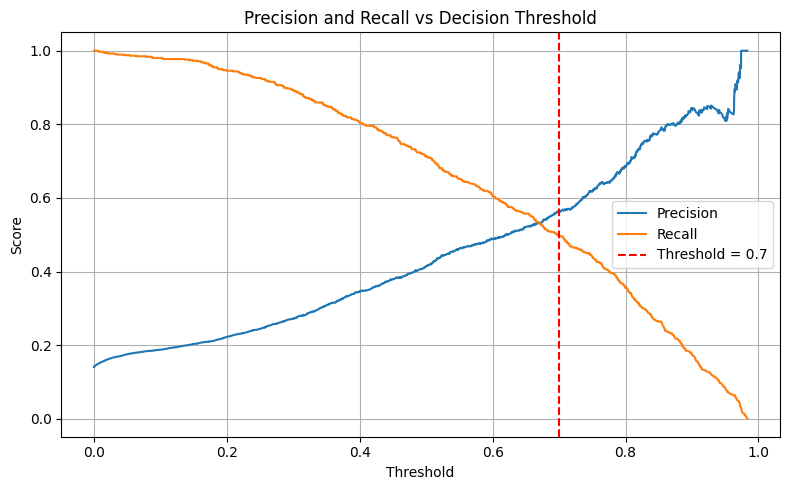

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import precision_recall_curve

# Compute precision, recall, thresholds
precisions, recalls, thresholds = precision_recall_curve(y_val, y_probs)

# Plot precision and recall as functions of the threshold
plt.figure(figsize=(8, 5))
plt.plot(thresholds, precisions[:-1], label="Precision")
plt.plot(thresholds, recalls[:-1], label="Recall")
plt.axvline(x=0.7, color='red', linestyle='--', label='Threshold = 0.7')
plt.xlabel("Threshold")
plt.ylabel("Score")
plt.title("Precision and Recall vs Decision Threshold")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

# Load training data
train_df = pd.read_csv("Train.csv")

# Drop unused columns
train_df = train_df.drop(columns=["uniqueid", "year"])

# Encode categorical variables
label_encoders = {}
for column in train_df.select_dtypes(include="object").columns:
    if column != "bank_account":
        le = LabelEncoder()
        train_df[column] = le.fit_transform(train_df[column])
        label_encoders[column] = le

# Encode target column
target_le = LabelEncoder()
train_df["bank_account"] = target_le.fit_transform(train_df["bank_account"])


In [ ]:
from sklearn.ensemble import RandomForestClassifier

# Split data
X = train_df.drop(columns="bank_account")
y = train_df["bank_account"]

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

# Train a Random Forest
rf = RandomForestClassifier(n_estimators=100, class_weight='balanced', max_depth=10, random_state=42)
rf.fit(X_train, y_train)


RandomForestClassifier(class_weight='balanced', max_depth=10, random_state=42)

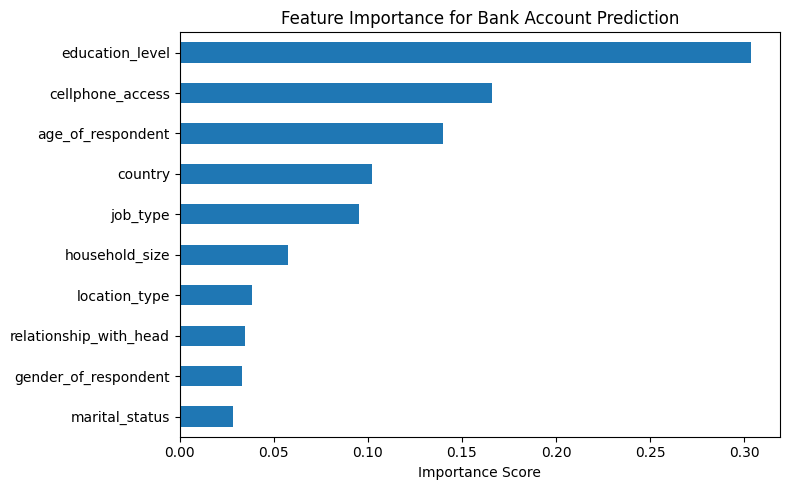

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

# Get feature importances
importances = pd.Series(rf.feature_importances_, index=X.columns)

# Plot
plt.figure(figsize=(8, 5))
importances.sort_values(ascending=True).plot(kind="barh")
plt.title("Feature Importance for Bank Account Prediction")
plt.xlabel("Importance Score")
plt.tight_layout()
plt.show()


In [ ]:
# Copy validation set
X_sim = X_val.copy()

# Get encoded value for 'Yes' in cellphone_access
cell_col = "cellphone_access"
yes_label = label_encoders[cell_col].transform(["Yes"])[0]

# Simulate: everyone has cellphone access
X_sim[cell_col] = yes_label

# Predict probabilities before and after
baseline_probs = rf.predict_proba(X_val)[:, 1]
simulated_probs = rf.predict_proba(X_sim)[:, 1]

# Calculate average change
average_lift = simulated_probs.mean() - baseline_probs.mean()
print(f"🔄 Avg increase in predicted bank account access if everyone had cellphone access: {average_lift:.4f}")


🔄 Avg increase in predicted bank account access if everyone had cellphone access: 0.0507


/tmp/ipython-input-24-1721479768.py:13: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


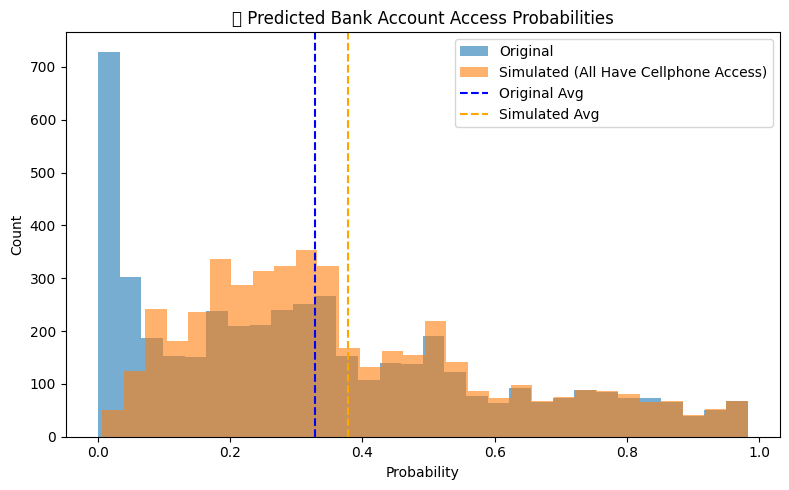

In [ ]:
import matplotlib.pyplot as plt

# Before and after probabilities (already computed)
plt.figure(figsize=(8, 5))
plt.hist(baseline_probs, bins=30, alpha=0.6, label="Original")
plt.hist(simulated_probs, bins=30, alpha=0.6, label="Simulated (All Have Cellphone Access)")
plt.axvline(baseline_probs.mean(), color='blue', linestyle='--', label='Original Avg')
plt.axvline(simulated_probs.mean(), color='orange', linestyle='--', label='Simulated Avg')
plt.title("📊 Predicted Bank Account Access Probabilities")
plt.xlabel("Probability")
plt.ylabel("Count")
plt.legend()
plt.tight_layout()
plt.show()

In [ ]:
# Only run if your dataset has a mobile money column
mobile_col = "uses_mobile_money"  # update this with actual column name

if mobile_col in X_val.columns:
    yes_label = label_encoders[mobile_col].transform(["Yes"])[0]
    X_mobile_sim = X_val.copy()
    X_mobile_sim[mobile_col] = yes_label

    mobile_probs = rf.predict_proba(X_mobile_sim)[:, 1]
    lift = mobile_probs.mean() - baseline_probs.mean()

    # Print average increase
    print(f"📈 Avg increase if all used mobile money: {lift:.4f}")

    # Visualize
    plt.figure(figsize=(8, 5))
    plt.hist(baseline_probs, bins=30, alpha=0.6, label="Original")
    plt.hist(mobile_probs, bins=30, alpha=0.6, label="Simulated (All Use Mobile Money)")
    plt.axvline(baseline_probs.mean(), color='blue', linestyle='--', label='Original Avg')
    plt.axvline(mobile_probs.mean(), color='green', linestyle='--', label='Simulated Avg')
    plt.title("📊 Bank Access Probabilities: Mobile Money Simulation")
    plt.xlabel("Probability")
    plt.ylabel("Count")
    plt.legend()
    plt.tight_layout()
    plt.show()
else:
    print("🚫 Mobile money feature not found in your dataset.")


🚫 Mobile money feature not found in your dataset.


In [ ]:
# Create fake mobile money feature (assume 30% originally had it)
import numpy as np

np.random.seed(42)
train_df["uses_mobile_money"] = np.random.choice(["Yes", "No"], size=len(train_df), p=[0.3, 0.7])

# Re-encode new column
le_mm = LabelEncoder()
train_df["uses_mobile_money"] = le_mm.fit_transform(train_df["uses_mobile_money"])
label_encoders["uses_mobile_money"] = le_mm


In [ ]:
# Create fake mobile money feature (assume 30% originally had it)
import numpy as np

np.random.seed(42)
train_df["uses_mobile_money"] = np.random.choice(["Yes", "No"], size=len(train_df), p=[0.3, 0.7])

# Re-encode new column
le_mm = LabelEncoder()
train_df["uses_mobile_money"] = le_mm.fit_transform(train_df["uses_mobile_money"])
label_encoders["uses_mobile_money"] = le_mm


In [ ]:
import pandas as pd

summary_data = {
    "Scenario": ["Original", "All Have Cellphone Access"],
    "Average Predicted Bank Account Probability": [
        baseline_probs.mean(),
        simulated_probs.mean()
    ]
}

# If mobile_probs was defined earlier, include it
if "mobile_probs" in locals():
    summary_data["Scenario"].append("All Use Mobile Money")
    summary_data["Average Predicted Bank Account Probability"].append(mobile_probs.mean())

summary_df = pd.DataFrame(summary_data)


/tmp/ipython-input-34-2500120819.py:10: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


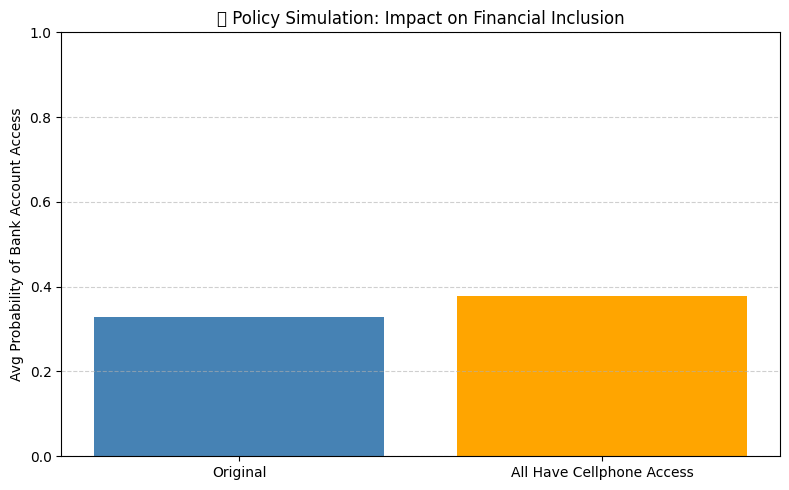

In [ ]:
import matplotlib.pyplot as plt

# Bar chart
plt.figure(figsize=(8, 5))
plt.bar(summary_df["Scenario"], summary_df["Average Predicted Bank Account Probability"], color=["steelblue", "orange", "green"][:len(summary_df)])
plt.ylabel("Avg Probability of Bank Account Access")
plt.title("📊 Policy Simulation: Impact on Financial Inclusion")
plt.ylim(0, 1)
plt.grid(axis="y", linestyle="--", alpha=0.6)
plt.tight_layout()
plt.show()
